# Лабораторная работа №8. Исследование рекуррентной нейронной сети Коско (ВАМ) на примере задачи распознавания образов

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.image as mpimg

## Необходимые функции

In [2]:
def get_net_forward(signal, weight):
    return np.dot(signal, weight)

In [3]:
def get_net_backward(response, weight):
    return np.dot(response, weight.transpose())

In [4]:
def activation_function(net):
    result = [[-1 if element <= 0 else 1 for element in row] for row in net]
    return np.array(result)

In [5]:
def show_signal(signal):
    signal_binary = np.array([[0 if element == -1 else 1 for element in row] for row in signal])
    plt.imsave('filename_1.png', np.array(signal_binary[0]).reshape(6,4), cmap=cm.gray)
    plt.imsave('filename_2.png', np.array(signal_binary[1]).reshape(6,4), cmap=cm.gray)
    plt.imsave('filename_3.png', np.array(signal_binary[2]).reshape(6,4), cmap=cm.gray)
    img_1 = mpimg.imread('filename_1.png')
    img_2 = mpimg.imread('filename_2.png')
    img_3 = mpimg.imread('filename_3.png')
    plt.subplot(131)
    plt.imshow(img_1)
    plt.subplot(132)
    plt.imshow(img_2)
    plt.subplot(133)
    plt.imshow(img_3)
    plt.show()

In [6]:
def activation_function(net, prev_f):
    for row in range(len(net)):
        for idx in range(len(net[row])):
            if net[row, idx] == 0:
                net[row, idx] = prev_f[row, idx]
            elif net[row, idx] < 0:
                net[row, idx] = -1
            else:
                net[row, idx] = 1
    return net

In [7]:
def get_response(signal, weight, expected_signal):
    net = get_net_forward(signal, weight)
    response_got = activation_function(net, expected_signal)
    return response_got

In [8]:
def get_signal(response, weight, expected_response):
    net = get_net_backward(response, weight)
    signal_got = activation_function(net, expected_response)
    return signal_got

In [9]:
response = np.array([[-1, -1, 1], [-1, 1, -1], [-1, 1, 1]])

In [10]:
signal = np.array([
    [-1, -1, 1, -1, -1, 1, 1, -1, 1, -1, 1, -1, -1, -1, 1, -1, -1, -1, 1, -1, -1, -1, 1, -1], 
    [-1, 1, 1, 1, -1, -1, -1, 1, -1, -1, 1, 1, -1, -1, -1, 1, -1, -1, -1, 1, 1, 1, 1, 1], 
    [1, 1, 1, 1, 1, -1, -1, -1, 1, 1, 1, 1, -1, -1, -1, 1, -1, -1, -1, 1, 1, 1, 1, 1]]
)

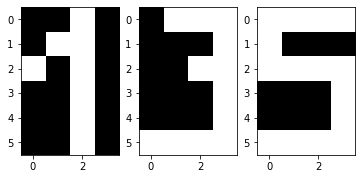

In [11]:
show_signal(signal)

In [12]:
weight = np.dot(signal.transpose(), response)

In [13]:
weight.shape

(24, 3)

## Рабочий режим. Расчет выходов нейронов второго слоя

In [14]:
response_got = get_response(signal, weight, signal)
(response_got == response).all()

True

In [15]:
response_got

array([[-1, -1,  1],
       [-1,  1, -1],
       [-1,  1,  1]])

## Рабочий режим. Расчет выходов нейронов первого слоя

In [16]:
signal_got = get_signal(response_got, weight, response)
(signal_got == signal).all()

True

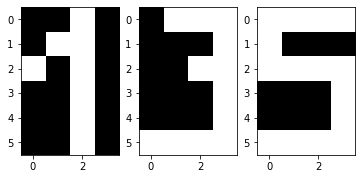

In [17]:
show_signal(signal_got)

## Рабочий режим. Расчет выходов нейронов второго слоя с искажениями во входном векторе

Случайно выбираем 3 пикселя в исходном сигнале (10% от 24 пикселей), изменяем их. После цикла в нейронной сети Коско сигнал правильно восстановлен.

In [18]:
noisy_signal = signal.copy()
for i in range(noisy_signal.shape[0]):
    np.random.seed = 24
    idx_to_change = np.random.randint(0, noisy_signal.shape[1], 3)
    for idx in idx_to_change:
        noisy_signal[i, idx] *= (-1)

In [19]:
noisy_signal

array([[-1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1, -1, -1, -1,  1, -1,
        -1, -1,  1, -1, -1, -1,  1, -1],
       [-1,  1,  1,  1, -1, -1, -1,  1, -1, -1, -1,  1,  1, -1,  1,  1,
        -1, -1, -1,  1,  1,  1,  1,  1],
       [ 1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1, -1, -1, -1,  1,
         1, -1, -1,  1, -1,  1,  1,  1]])

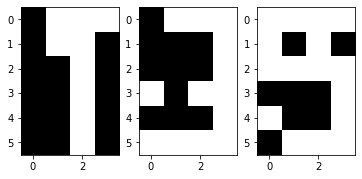

In [20]:
show_signal(noisy_signal)

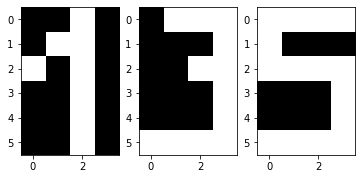

In [21]:
response_got = get_response(noisy_signal, weight, signal)
signal_got = get_signal(response_got, weight, response)
show_signal(signal_got)

In [22]:
(signal_got == signal).all()

True